In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

# On importe les données

In [81]:
data=pd.read_csv("../data/car_sales.csv")
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


# Test et nettoyage

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [83]:
data.shape

(157, 16)

In [84]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

On supprime les entrées ou le prix est égal à 0 car cela ne suit pas ce que l'on recherche

In [85]:
data.drop(data[data['Price_in_thousands'] == 0].index, inplace=True)
data.shape

(157, 16)

On supprime tous les na du dataset

In [86]:
data.dropna(inplace=True,axis=0)
data.shape

(117, 16)

In [87]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


On teste si il y a des données en doubles dans la table :

In [88]:
data.duplicated().sum()

0

# EDA

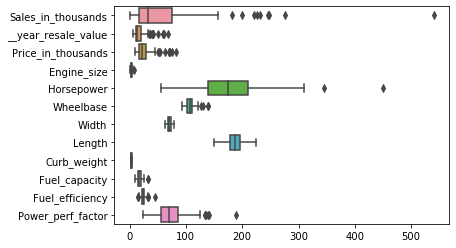

In [89]:
sns.boxplot(data=data,orient='h')

Ici, on va pouvoir considérer les différentes données abérrantes : plus de 250  (au premier abord) pour les ventes, les données supérieures à 305 pour les chevaux. Il semble ne pas y  avoir de grosses données aberrantes pour le prix, à verifier avec des graphiques plus précis

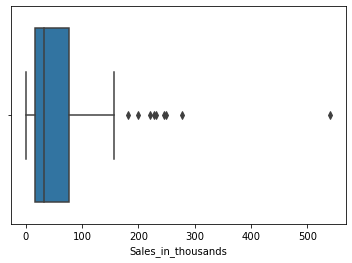

In [90]:
sns.boxplot(x=data['Sales_in_thousands'])

In [91]:
data['Sales_in_thousands'].describe

<bound method NDFrame.describe of 0      16.919
1      39.384
3       8.588
4      20.397
5      18.780
        ...  
145     9.761
146    83.721
147    51.102
148     9.569
149     5.596
Name: Sales_in_thousands, Length: 117, dtype: float64>

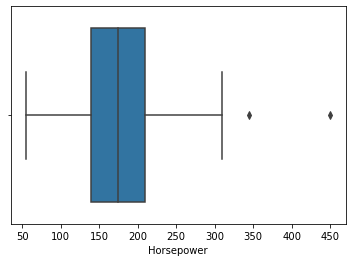

In [92]:
sns.boxplot(x=data['Horsepower'])

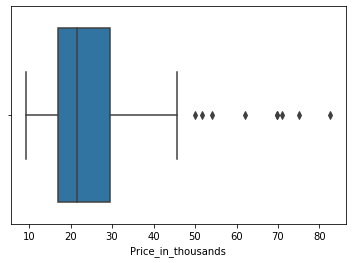

In [95]:
sns.boxplot(x=data['Price_in_thousands'])

In [96]:
data.drop(data[data['Horsepower'] >= 305].index,inplace=True)
data.shape

(114, 16)

In [97]:
data.drop(data[data['Sales_in_thousands'] >= 150].index,inplace=True)
data.shape

(103, 16)

In [99]:
data.drop(data[data['Price_in_thousands'] >= 45].index,inplace=True)
data.shape

(96, 16)

On traite les données aberrantes grace à l'interquartile ou IQR

In [100]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sales_in_thousands     49.633000
__year_resale_value     7.480000
Price_in_thousands     10.008750
Engine_size             1.500000
Horsepower             62.000000
Wheelbase               7.350000
Width                   4.725000
Length                 17.325000
Curb_weight             0.717750
Fuel_capacity           3.550000
Fuel_efficiency         5.000000
Power_perf_factor      29.347996
dtype: float64


In [101]:
data = data[~((data < (Q1 - 1.5*IQR))|(data > (Q3 + 1.5*IQR))).any(axis = 1)]
data.shape

(82, 16)

In [102]:
data.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.292368,-0.225601,0.117152,-0.030152,0.070554,0.037536,0.033948,-0.040690,-0.075557,0.016200,-0.058767
__year_resale_value,-0.292368,1.000000,0.862538,0.440549,0.626383,0.315569,0.241253,0.270791,0.607737,0.582512,-0.484207,0.672325
Price_in_thousands,-0.225601,0.862538,1.000000,0.704857,0.866415,0.535186,0.473469,0.556247,0.796889,0.691266,-0.598376,0.901656
Engine_size,0.117152,0.440549,0.704857,1.000000,0.845667,0.619124,0.665231,0.706569,0.834029,0.708660,-0.687263,0.842504
Horsepower,-0.030152,0.626383,0.866415,0.845667,1.000000,0.663820,0.616721,0.738472,0.794013,0.694491,-0.592281,0.997118
Wheelbase,0.070554,0.315569,0.535186,0.619124,0.663820,1.000000,0.719137,0.842921,0.734655,0.568134,-0.386539,0.656519
Width,0.037536,0.241253,0.473469,0.665231,0.616721,0.719137,1.000000,0.747234,0.681203,0.544545,-0.402502,0.607426
Length,0.033948,0.270791,0.556247,0.706569,0.738472,0.842921,0.747234,1.000000,0.686235,0.495241,-0.319242,0.724594
Curb_weight,-0.040690,0.607737,0.796889,0.834029,0.794013,0.734655,0.681203,0.686235,1.000000,0.866863,-0.788176,0.810377
Fuel_capacity,-0.075557,0.582512,0.691266,0.708660,0.694491,0.568134,0.544545,0.495241,0.866863,1.000000,-0.846422,0.707670


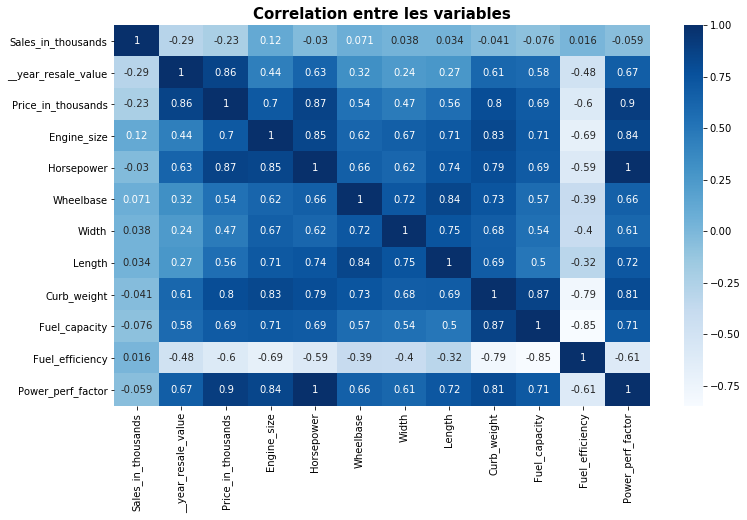

In [105]:
data_corr=data.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(data_corr,cmap='Blues',annot=True)
plt.title("Correlation entre les variables",weight='bold',fontsize=15)
plt.show()

On ne retrouve pas de corrélation positive entre le prix et les ventes. Les ventes ont l'air de ne pas avoir de veritables facteurs corrélés, peut-être que les données abberrantes auraient pu permettre d'en degager un. A contrario, le prix est très corrélé aux chevaux et à la performance en puissance de la voiture, ainsi qu'à la taille du moteur. Il pourrait donc être intéressant de regarder avec un diagramme le prix par rapport aux chevaux du vehicule.

In [116]:
def getrange(Price):
    if (Price >= 0 and Price < 15):
        return '0 - 15'
    if (Price >= 15 and Price < 30):
        return '15 - 30'
    if (Price >= 30 and Price < 45):
        return '30 - 45'

       
data['echelle_de_prix'] = data.apply(lambda x:getrange(x['Price_in_thousands']),axis = 1)

data['echelle_de_prix'].value_counts()
def getrangeh(Horsepower):
    if (Horsepower >= 92 and Horsepower < 127):
        return '92 - 127'
    if (Horsepower >= 127 and Horsepower < 162):
        return '127 - 162'
    if (Horsepower >= 162 and Horsepower < 197):
        return '162 - 197'
    if (Horsepower >= 197 and Horsepower < 276):
        return '197 - 276'

       

data['echelle_de_prix'].value_counts()       


15 - 30    56
0 - 15     15
30 - 45    11
Name: echelle_de_prix, dtype: int64

In [111]:
data['echelle_de_chevaux'] = data.apply(lambda x:getrangeh(x['Horsepower']),axis = 1)

data['echelle_de_chevaux'].value_counts()

197 - 276    25
127 - 162    22
162 - 197    20
92 - 127     15
Name: echelle_de_chevaux, dtype: int64

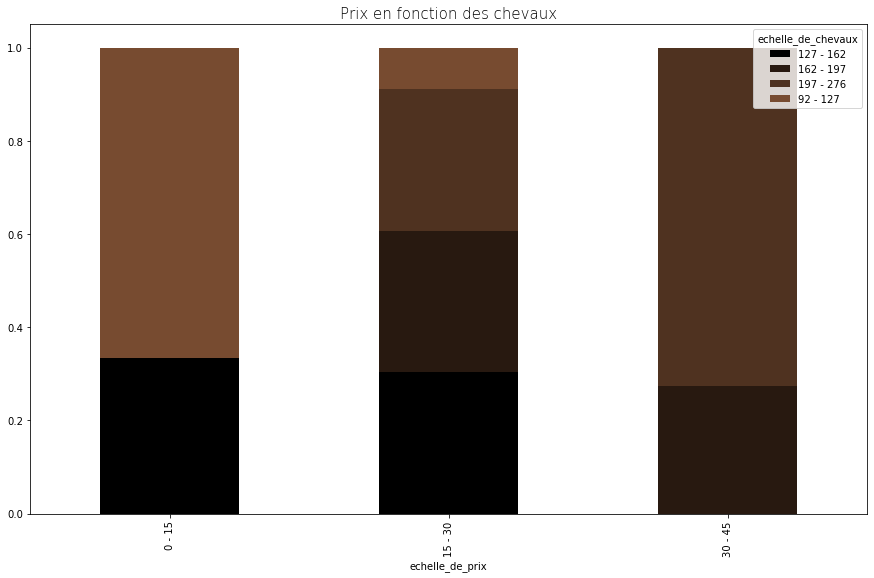

In [112]:
plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(data['echelle_de_prix'],data['echelle_de_chevaux'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True ,color=color)
plt.title("Prix en fonction des chevaux",fontweight = 21,fontsize = 15)
plt.show()

On peut voir que les vehicules appartenant à la catégorie "coutant entre 15 et 30k $" sont celles pouvant être des 4 catégories de chevaux. On Remarque aussi que la catégorie de prix la plus basse contient des vehicules à faible capacités de chevaux seulement, et l'inverse est remarqué dans la catégorie de prix la plus haute.

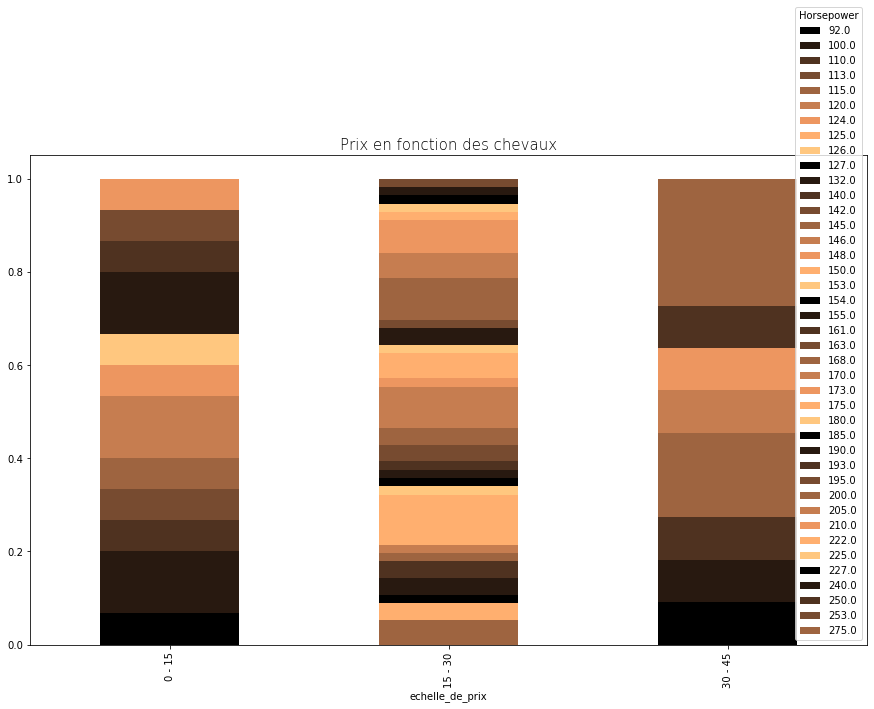

In [113]:
plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(data['echelle_de_prix'],data['Horsepower'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True ,color=color)
plt.title("Prix en fonction des chevaux",fontweight = 21,fontsize = 15)
plt.show()

Voici la version détaillé des prix par la puissance en chevaux, pas vraiment lisible d'ou l'interêt de les avoir catégorisé sur le graphique plus haut.